# Assignment 2.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model, model_selection


(20, 1)


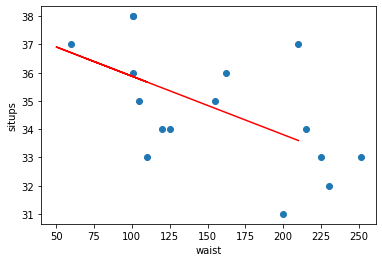

Mean squared error: 21.23


In [2]:
# import linnerude dataset
df = sklearn.datasets.load_linnerud()

# waist and situps
waist = df.data[:,1]
situps = df.target[:,1]

#reshape data: 
waist = waist.reshape(-1,1)
situps = situps.reshape(-1,1)
print(situps.shape)

#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#X_train, X_test, y-train, y_test = train_test_split(waist, situps, test_size=0.2)
waist_train, waist_test, situps_train, situps_test = sklearn.model_selection.train_test_split(waist, situps, test_size=0.2)

#fit model
model.fit(waist_train, situps_train)

#predict
situp_predict = model.predict(waist_test)

#plot relationship between waist and situps
plt.scatter(waist_train, situps_train)
plt.plot(waist_test, situp_predict, color='red')
plt.xlabel('waist')
plt.ylabel('situps')
plt.show()

# mean squared error
from sklearn.metrics import mean_squared_error
print('Mean squared error: %.2f' % mean_squared_error(situps_test, situp_predict))


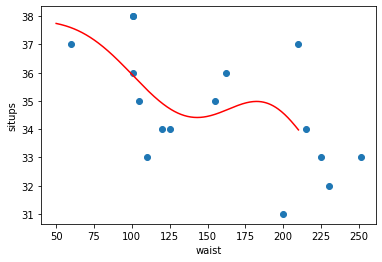

Mean squared error: 18.36


In [3]:
#Does it improve by using polynomial regression?
from math import degrees
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#polynomial regression
degrees = 10
poly_reg_model = make_pipeline(PolynomialFeatures(degrees), LinearRegression())
poly_reg_model.fit(waist_train, situps_train)
X_seq = np.linspace(waist_test.min(),waist_test.max(),300).reshape(-1,1)


#plot relationship between waist and situps
plt.scatter(waist_train, situps_train)
plt.plot(X_seq, poly_reg_model.predict(X_seq), color='red')
plt.xlabel('waist')
plt.ylabel('situps')
plt.show()

# mean squared error
from sklearn.metrics import mean_squared_error
print('Mean squared error: %.2f' % mean_squared_error(situps_test, poly_reg_model.predict(waist_test)))

# Assignment 2.2

In [21]:
# import pumpkin data set
pumpkin_df = pd.read_csv('data/US-pumpkins.csv')
pumpkin_df.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [32]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package','Low Price','High Price', 'Date']

new_pumpkins = pumpkin_df.drop([c for c in pumpkin_df.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)
new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Date  Low Price  High Price  Origin  \
2             1        3        4    15         29          26       3   
3             1        3        4    15         29          26      17   
4             1        3        4     9         16          14       5   
5             1        3        4     5         16          14       5   
6             1        4        4    15         29          28       5   
...         ...      ...      ...   ...        ...         ...     ...   
1694         12        3        5    16         27          23       4   
1695         12        3        5    17         27          23       4   
1696         12        3        5    18         27          23       4   
1697         12        3        5    19         27          23       4   
1698         12        3        5    20         27          23       4   

      Item Size  Color  
2             3      0  
3             3      0  
4   

In [39]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package','Low Price','High Price', 'Date']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.41      0.48      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.8090452261306532


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[161,   5],
       [ 33,   0]], dtype=int64)

c:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

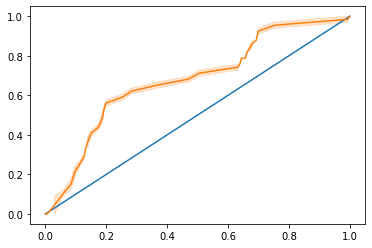

In [42]:
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)


# Assignment 2.3
